In [3]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
#split dataset into training and testing data
!cd /content/drive/MyDrive/darknet/data/ && python3 split.py


In [3]:
# make file (makefile modifies to allow use of colab GPU)
!cd /content/drive/MyDrive/darknet && make

chmod +x *.sh


In [ ]:
# train model based on pre-trained yolo weights
# final weights stored in backup/yolo-obj_final.weights
!cd /content/drive/MyDrive/darknet && ./darknet detector train data/obj.data cfg/yolo-obj.cfg yolov3.weights -dont_show -clear 1

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.696357), count: 15, class_loss = 1.639254, iou_loss = 0.869161, total_loss = 2.508415 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.668401), count: 2, class_loss = 0.245259, iou_loss = 0.114300, total_loss = 0.359559 
 total_bbox = 276029, rewritten_bbox = 0.034779 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.725080), count: 7, class_loss = 0.450208, iou_loss = 0.233871, total_loss = 0.684078 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.693804), count: 5, class_loss = 0.441251, iou_loss = 0.232225, total_loss = 0.673476 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.722556), count: 3, class_loss = 0.332034, iou_loss = 0.079622, total_loss = 0.411656 
 total_bbox = 276044, rewritten_bbox = 0.034777 % 
v3 (

In [4]:
# evaluate performance
!cd /content/drive/MyDrive/darknet && chmod +x ./darknet &&  ./darknet detector map data/obj.data cfg/yolo-obj.cfg backup/yolo-obj_final.weights

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     18       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  18 0.168 BF
   1 conv     18       3 x 3/ 2    416 x 416 x  18 ->  208 x 208 x  18 0.252 BF
   2 conv     18       1 x 1/ 1    208 x 208 x  18 ->  208 x 208 x  18 0.028 BF
   3 conv     18       3 x 3/ 1    208 x 208 x  18 ->  208 x 208 x  18 0.252 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  18 0.001 BF
   5 conv     18       3 x 3/ 2    208 x 208 x  18 ->  104 x 104 x  18 0.063 BF
   6 conv     18       1 x 1/ 1    104 x 104 x  18 ->  104 x 104 x  18 0.007 BF
   7 conv     18       3 x 3/ 1    104 x 104 x  18 ->  104 x 104 x  18 0.063 BF
   8 Shortcut Layer: 5, 

In [29]:
# cd into darknet and import libraries to run detection
%cd /content/drive/MyDrive/darknet
import cv2
import numpy as np
import glob
import random
import os
from google.colab.patches import cv2_imshow

/content/drive/MyDrive/darknet


In [22]:
# helper methods to get output layers
def getOutputLayers(net):
  layer_names = net.getLayerNames()
  return [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

# function to draw bounding box on the detected object with class name
def draw_bounding_box(img, class_id, confidence, x, y, x_plus_w, y_plus_h):

    label = str(classes[class_id])

    color = colors[class_id]

    cv2.rectangle(img, (x,y), (x_plus_w,y_plus_h), color, 2)

    cv2.putText(img, label, (x-10,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

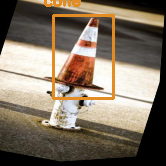

im_193_jpg.rf.2016302d03556e15ebca878d440265b9.jpg


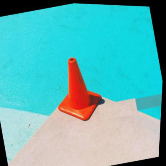

im_183_jpg.rf.f07ff87b0626ed17776c395e1dc55550.jpg


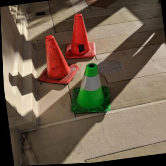

img_20_jpg.rf.ce225405bf012d6a43368ecb6fe3227d.jpg


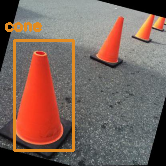

im_70_jpg.rf.e0480eed6e0224b66166b4785e4f6f56.jpg


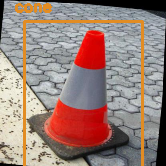

im_232_jpg.rf.eae9537d44814777488973f2aef4bdf8.jpg


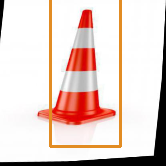

im_7_jpg.rf.9d2b320a59a07340a805231cb85f5bfd.jpg


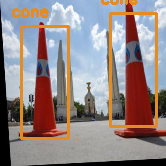

im_55_jpg.rf.158309105db0ddf40f37e88cedcc6f6d.jpg


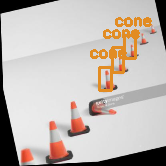

im_142_jpg.rf.de09ccf09f23f741e4a1066fb99a0fe2.jpg


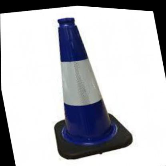

im_322_jpg.rf.4abec75ba4900e1cf84761c0f4045f88.jpg


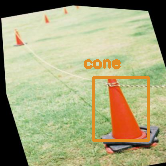

im_93_jpg.rf.62668b389ac5843a535e5b45672f6e68.jpg


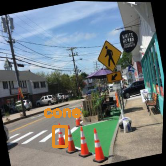

img_29_jpg.rf.354f35fbd81f3929b3e8d7e7a0369ca0.jpg


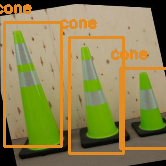

img_17_jpg.rf.449d7acf9b29db764f7c5ec179fbef97.jpg


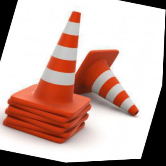

im_43_jpg.rf.84f81e8b1e91892ac91c7d82c17d7bc7.jpg


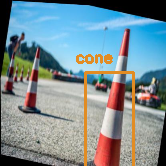

img_25_jpg.rf.e8176ba0e211483079e793f0519b4061.jpg


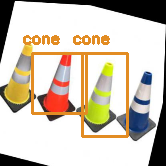

img_5_jpg.rf.3b7f204ead22624b1572f664ce0f13c0.jpg


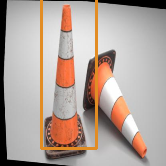

img_21_jpg.rf.bebbca98f4542bae87a1015673b055d5.jpg


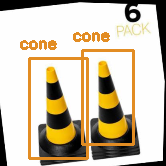

im_270_jpg.rf.84054299d9987620ef0e3b7e3a8a0c8a.jpg


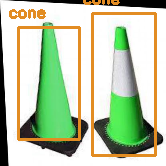

img_23_jpg.rf.9e4ced9ba34f9697e9ab9ce02e679a91.jpg


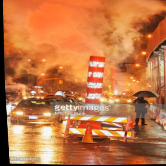

im_128_jpg.rf.05fe4ebbbf1d267c33f5c0d536717fb1.jpg


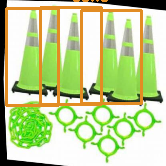

img_3_jpg.rf.6f85e8cfca97efd637b01ae6a73a6d1b.jpg


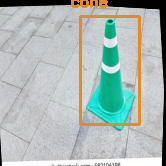

img_1_jpg.rf.0a00ba2b25c7f37ea7dc804a18edeb5a.jpg


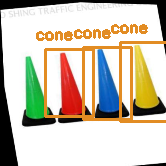

img_4_jpg.rf.90f699bdae1eaaa35b1227685b518e7b.jpg


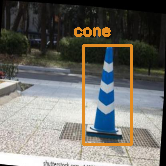

img_7_jpg.rf.e9b55af3c85381f650538d8c760ae734.jpg


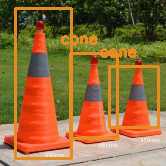

img_2_jpg.rf.76efd5a4b8e9e7445d9e27e3cf1527b3.jpg


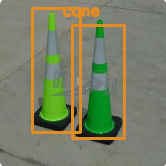

img_22_jpg.rf.3261240a9ed0fa5b4df400d383ab2618.jpg


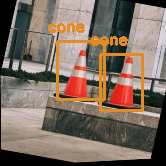

img_14_jpg.rf.08b8723d459d8e08a13662cf87b58c88.jpg


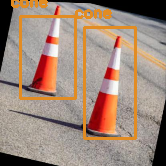

img_19_jpg.rf.5632b0c1f700d2615d16b3ba8324d4fc.jpg


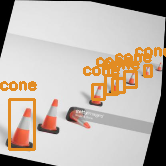

im_142_jpg.rf.8b67c1444b586d7beb402b4923c94776.jpg


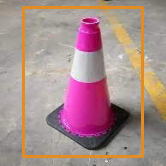

img_12_jpg.rf.ff330e6526ef0db94c1a8f3415913214.jpg


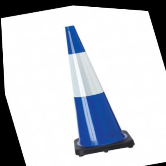

im_288_jpg.rf.7973ee6dc513d3772a53bd8c41c121c4.jpg


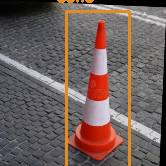

img_27_jpg.rf.7d847e83a7b10f6b1da597f16d1d17a3.jpg


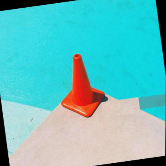

im_183_jpg.rf.0cb45ab23d1c9477c8ddc868aea8010b.jpg


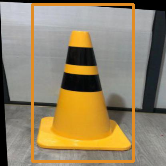

im_349_jpg.rf.61fbc3da3b5ab3a5f7f376ca5df168f2.jpg


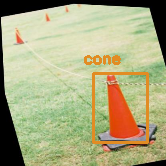

im_93_jpg.rf.c936015284abd73f420bc193852fb11e.jpg


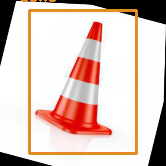

im_7_jpg.rf.48f707408e01bbbcf795275adf4abdba.jpg


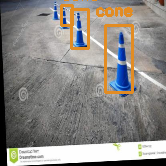

im_313_jpg.rf.59d9201b169436a71421c5c03e5b84b5.jpg


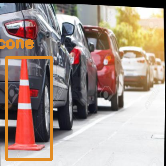

img_8_jpg.rf.c4cdec04f5134e4cc331bb49a93031cc.jpg


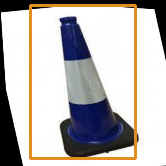

im_322_jpg.rf.dea2de768e65bd1771f98b9d4fbdf7c7.jpg


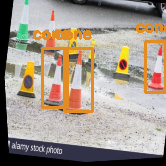

img_13_jpg.rf.c6ec7a3895a6b5a640fb787216d4c526.jpg


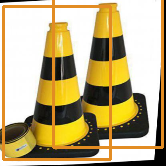

im_279_jpg.rf.8b2f06e432090b0ea195a614e8dc7509.jpg


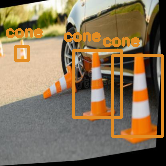

img_10_jpg.rf.99e962ac4e5eb780ba4889457fd0e439.jpg


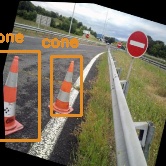

img_16_jpg.rf.385fad4afd7bea8067e32d895bc90fbb.jpg


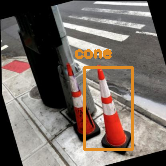

img_16_jpg.rf.306fabe62dad3ac98590f752565c8112.jpg


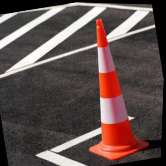

im_16_jpg.rf.870e2bb421ea6f7237d3e3a266650eea.jpg


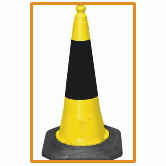

im_319_jpg.rf.7d9cb9097a2f535b0ecf3b9951f9fe8f.jpg


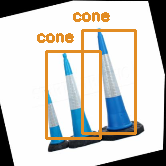

im_295_jpg.rf.708b252ef67899ca906e6b42402545bb.jpg


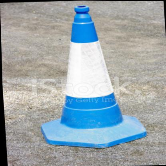

im_293_jpg.rf.f981f3c5bec8d785448c4972731c463d.jpg


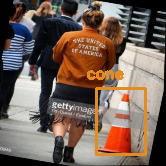

im_184_jpg.rf.59a9dba8d425238e300321c59dfbf87c.jpg


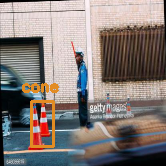

im_125_jpg.rf.86740d807755dc8aaa13986de4a2c1c2.jpg


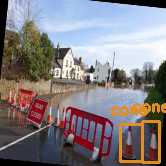

im_121_jpg.rf.f00bf189a1bdd5f794f313af1f95299f.jpg


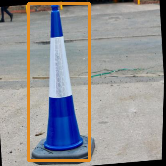

im_272_jpg.rf.775da06afddd22ecf02de68755e324ff.jpg


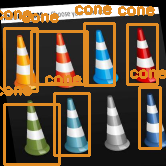

img_18_jpg.rf.74d33505e5c53c71a2a62ae100951664.jpg


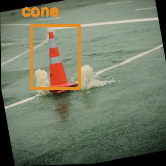

im_198_jpg.rf.8f2ad18e48ac2407ce07efbf5abd6539.jpg


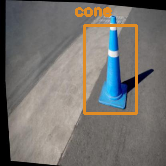

img_23_jpg.rf.e8cc2e499ce77288cdbe5adc79981f3e.jpg


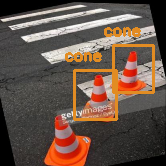

im_175_jpg.rf.9bc1b6ddb2eabe6bc9af9f0cdc7acfb4.jpg


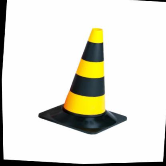

im_325_jpg.rf.925d600038de3315abb2078945178c0a.jpg


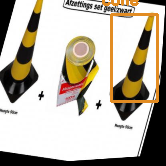

im_284_jpg.rf.5dd84b3f5e73c3727358be69fdbabb3d.jpg


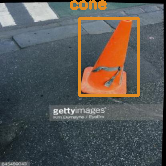

im_188_jpg.rf.a90f87c4a00050a482e998d4547b1b54.jpg


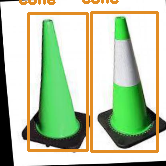

img_23_jpg.rf.520b3d5cf676cc1e32810e6bb41b86a0.jpg


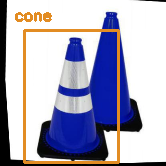

im_291_jpg.rf.d1aa2048921ef6ecff43c09c39ac43e2.jpg


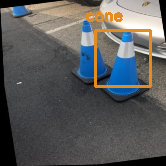

img_3_jpg.rf.c9f757e95e3a3db13ce03578fa79b0a6.jpg


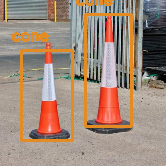

img_2_jpg.rf.b85bd7843b9ca3b0ca0551bcf12eb228.jpg


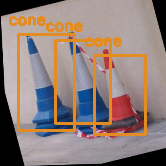

im_317_jpg.rf.34d8ac8e18d95fafb1ecdba4c78f8e83.jpg


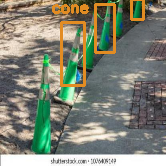

img_12_jpg.rf.08f13ab595e3f9f5baddda804294af85.jpg


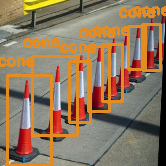

im_47_jpg.rf.3beca64c3d2df8491f94e7c1faf6d1d0.jpg


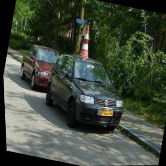

im_354_jpg.rf.d7010599f76825588048f1c2841565e8.jpg


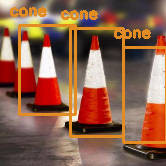

img_9_jpg.rf.6bd879f1b2a147571c4e10e864f6e37c.jpg


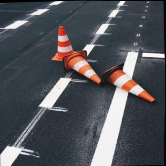

im_216_jpg.rf.f89bc3a1869b8c009c5dd53e0493c589.jpg


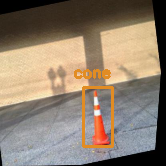

im_197_jpg.rf.35832d3635669b4f09ce24e93792fd6c.jpg


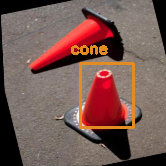

im_181_jpg.rf.1d77937a9c984929cdee1700a13c3403.jpg


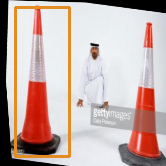

im_154_jpg.rf.447438ff7fb03e9660869d5b3757dae3.jpg


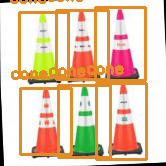

img_12_jpg.rf.afa264a323d0ee2faca0412101fe01ba.jpg


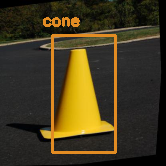

img_8_jpg.rf.85ed6516155e4f6cc883f09b119b4770.jpg


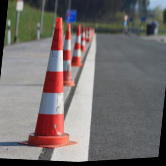

im_25_jpg.rf.05e4e1d2f3a92512190622e0f1d65dcd.jpg


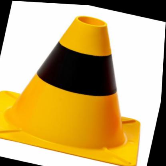

im_347_jpg.rf.e3162500209175ee6ded9e8e68625168.jpg


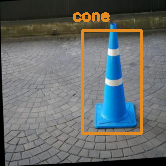

img_18_jpg.rf.84612314a239b2b1d31cfe0242afe5c1.jpg


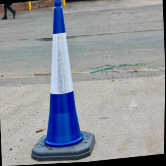

im_272_jpg.rf.d5f0116eec2d7bedb1206bf2377c9fed.jpg


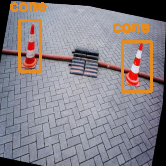

im_179_jpg.rf.f08d31c687c2e7b812914cee28e6aa5e.jpg


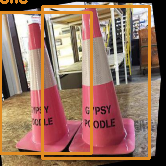

img_16_jpg.rf.4eeabc0272e29fece327e2a13b80b322.jpg


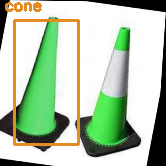

img_23_jpg.rf.0eecf0045fffaec038958d444ed5089f.jpg


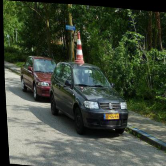

im_354_jpg.rf.80cdfb0eb4b856ec733c54f579851ed4.jpg


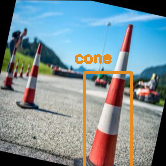

img_25_jpg.rf.ee12a91d2cb61dada2def2c3501c4aa6.jpg


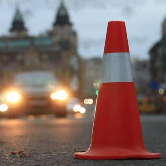

img_29_jpg.rf.ff8121cdeadd3cb4904370909000fb8c.jpg


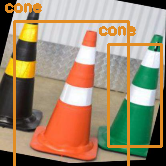

img_9_jpg.rf.e9ac3437980b4110f6678f62863a84e5.jpg


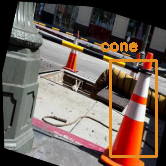

im_245_jpg.rf.0d020822b5a17211b81d5a3d6cb35884.jpg


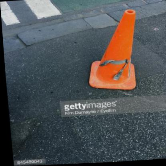

im_188_jpg.rf.0cd8b51a7991555a86df0f79ef0ebda4.jpg


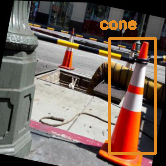

im_245_jpg.rf.e6a4848e6955fe0c196f1827694a5728.jpg


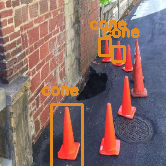

img_17_jpg.rf.78242b9d29aab8fbaf6b1a3f95b69e75.jpg


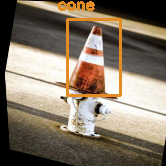

im_193_jpg.rf.d230781d2653b2f4dde8db0b05702cb1.jpg


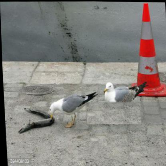

im_239_jpg.rf.83f77a8ce7b9b46b7bec4f2f5fcfa062.jpg


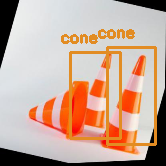

im_143_jpg.rf.d7ffc69ef37e85410e750f6ad2c1aecc.jpg


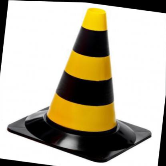

im_296_jpg.rf.5402be53ae182f50d94b01eb09d1bc9e.jpg


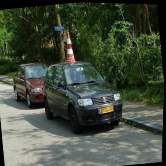

im_354_jpg.rf.61d2d2bdfd0192e6605b77cf21d4a886.jpg


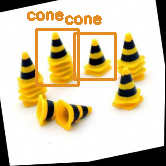

im_330_jpg.rf.421a9545f96be9ce3cecb21252ab11d0.jpg


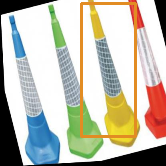

img_25_jpg.rf.a9a9db66351768a3fb3c5f395ad7d863.jpg


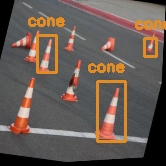

im_351_jpg.rf.604351b996153250b866681bc938ec8b.jpg


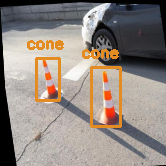

img_24_jpg.rf.e87acd32483a2d5b0acf4013d96c6449.jpg


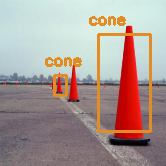

im_14_jpg.rf.a0d02950f4cc34d59e5d903b2cd58d6c.jpg


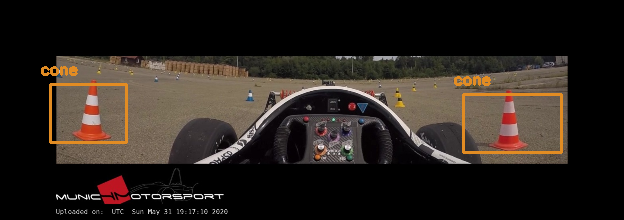

mms_00597.jpg


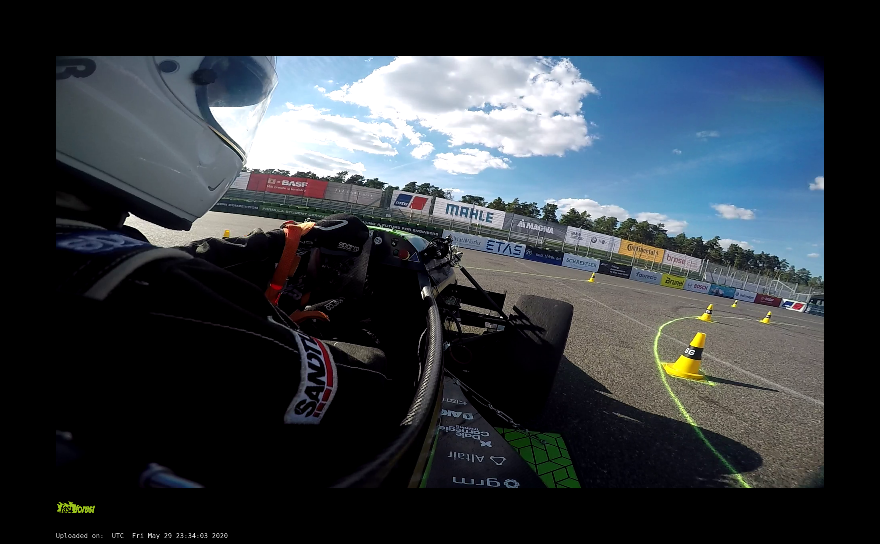

ff_00267.jpg


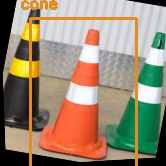

img_9_jpg.rf.d11410552e8691e206fc77930d48dc08.jpg


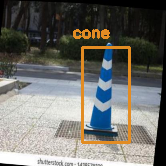

img_7_jpg.rf.2b15fb6012fa9507f5410cdf9839f03a.jpg


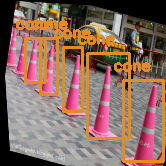

img_24_jpg.rf.d82319091f817e4249e78c9fd6c8892f.jpg


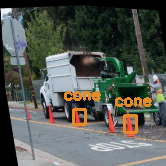

img_5_jpg.rf.8d8fda216504006a9d8cccc0693809a4.jpg


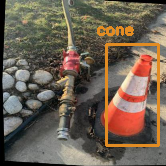

im_177_jpg.rf.ab08ca57b3117613c559019a3779d624.jpg


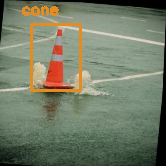

im_198_jpg.rf.7eb42c80c1ae94367e250ae990c4c76a.jpg


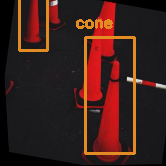

im_249_jpg.rf.8c9d642b2c4086e305f8ed376155eaa2.jpg


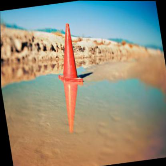

im_104_jpg.rf.9718a0b3094d96100784fd9fd56cd875.jpg


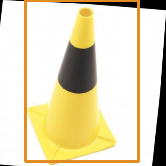

im_332_jpg.rf.0cdb27d3d5182006d9b4395ac334c133.jpg


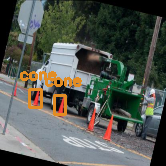

img_5_jpg.rf.6771e0b2848fb8c0a6c4758b3f37c37e.jpg


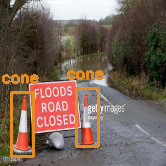

im_118_jpg.rf.03eebc16e9f1ba724dd9fbf8eb7e0b57.jpg


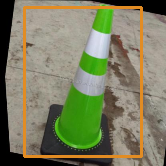

img_10_jpg.rf.b570126801d3f2b3af27bee4ee178a2a.jpg


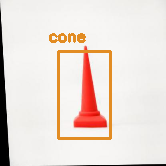

im_131_jpg.rf.c105e0faeea692f966ea5f5b4dfde889.jpg


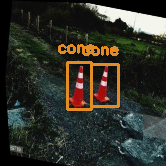

im_231_jpg.rf.818c4970d047f78dbb4441384786f21c.jpg


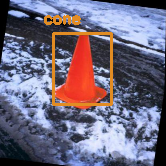

im_236_jpg.rf.6dcbd44e06ecf6c5a1c35f0668115564.jpg


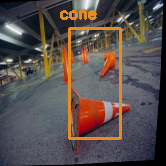

im_226_jpg.rf.8e6de1ccf69afe05b6ac74e17a522f4f.jpg


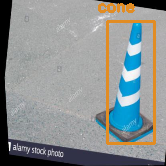

im_331_jpg.rf.468ad84b21fae5913f482f3b671965a5.jpg


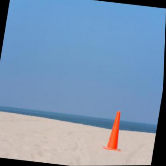

im_195_jpg.rf.6470ea2172413265439fa89bc3142b8a.jpg


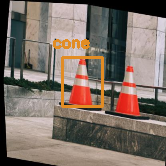

img_14_jpg.rf.6c50ad5ea036dca0a77f5675602a3c48.jpg


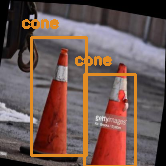

img_11_jpg.rf.9a52c4f2918de2f997f5ff913ff03ed7.jpg


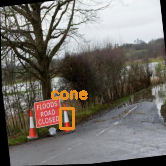

im_119_jpg.rf.92e391c5107a90cc9878c20af5475d88.jpg


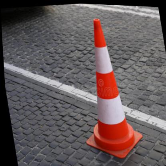

img_27_jpg.rf.40e82dbb3f754d63a455fab9a81d559a.jpg


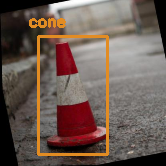

im_1_jpg.rf.ae461afaee0e25a5fc4e7a6a2e8669e8.jpg


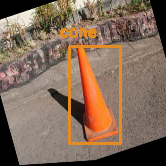

im_219_jpg.rf.1eb99fc34ed6b7f660ae75dac94139db.jpg


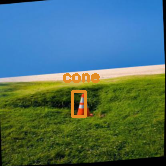

im_148_jpg.rf.3c422efc26de0319bc3cfbb71746b3d5.jpg


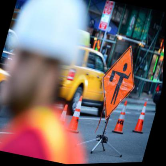

im_213_jpg.rf.0072246b8f4ea27ac4ccf51c4dc60b7b.jpg


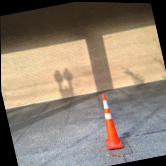

im_197_jpg.rf.a59c82e8c022c791de7c784262980f23.jpg


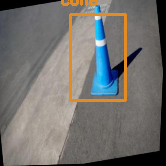

img_23_jpg.rf.6eea8df2ef380edf70f93ddad539243f.jpg


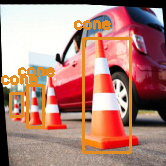

img_7_jpg.rf.b37f95e57f70d0351cb8acc7d50c4b99.jpg


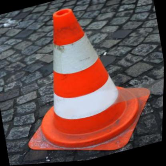

im_114_jpg.rf.1ec4da15997065cdfb2a2e3ba7a11bf2.jpg


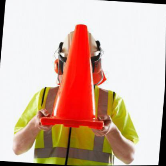

im_116_jpg.rf.31bf389de1c4c99747512e435aceee3c.jpg


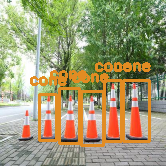

img_8_jpg.rf.bcc663799c91e2cadd2be081346f8475.jpg


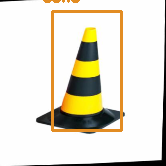

im_325_jpg.rf.cf9ad5082f4f4ace31ff02b81fc9fbd1.jpg


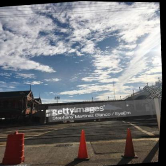

im_187_jpg.rf.18a8de0577df2eff0a5c11db30c546db.jpg


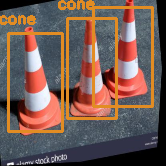

img_22_jpg.rf.978e416a6ccb809e57818237ff908139.jpg


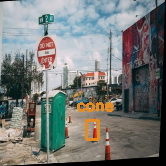

img_35_jpg.rf.6d2f0c6aba8ac2d5077c3858ceaa2b60.jpg


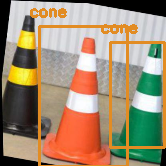

img_9_jpg.rf.12ef6cd22183fab7e534dac5439ef6ce.jpg


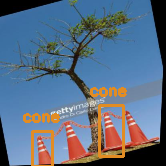

im_220_jpg.rf.8f1b4c0ce35a5318916de8ae17a0601e.jpg


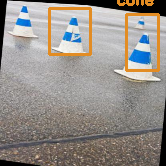

im_99_jpg.rf.936cbb63abb9ae46d3fc93df54d2e068.jpg


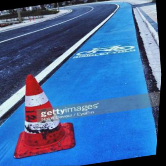

im_186_jpg.rf.bde96e3abf0d7b0f0baa7d61660c2e3b.jpg


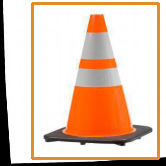

im_134_jpg.rf.932c1e4f7efab6911703fc0b7eb4c2d2.jpg


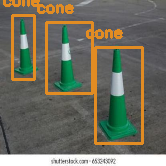

img_9_jpg.rf.c3e40d18d0ad93620143c9e90e7f7c5a.jpg


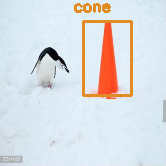

im_241_jpg.rf.af189dc72c769acf5586beba2a225102.jpg


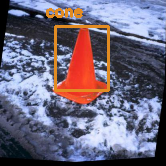

im_236_jpg.rf.67b9f4fc0cea83ac30a81ed380b7978e.jpg


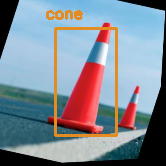

im_21_jpg.rf.951ba8b2a1f97ffb7cdca0109e89faed.jpg


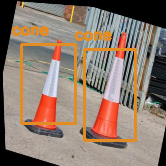

im_2_jpg.rf.d0c74b5326d29f9ebce40364e425c2f0.jpg


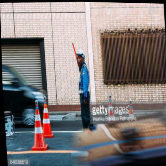

im_125_jpg.rf.341191f523b44ef2ecd795a9f3b38806.jpg


In [36]:
# open testing images file paths
file_test = open('data/valid.txt')
lines = file_test.readlines()
paths = [line.rstrip() for line in lines]

# read pre-trained model and config file
net = cv2.dnn.readNet("backup/yolo-obj_final.weights", "cfg/yolo-obj.cfg")

# single class for cones
classes = ["cone"]

# function to get the output layer names in the architecture
output_layers = getOutputLayers(net)
colors = np.random.uniform(0, 255, size=(len(classes), 3))

# draw bounding box for all test images
for img_path in paths:
    #read image
    img = cv2.imread(img_path)
    img = cv2.resize(img, None, fx=0.4, fy=0.4)
    height, width, channels = img.shape
    scale = 0.00392

    # create input blob
    blob = cv2.dnn.blobFromImage(img, scale, (416, 416), (0, 0, 0), True, crop=False)

    # set input blob for the networl
    net.setInput(blob)

    #running inference
    outs = net.forward(output_layers)
    class_ids = []
    confidences = []
    boxes = []
    conf_threshold = 0.3
    nms_threshold = 0.4

    # for each detetion from each output layer box confident detections 
    # and ignore weak detections (confidence < threshold)
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            
            # conf_threshold to adjust how much confidence is strong enough
            if confidence > conf_threshold:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)
                class_ids.append(class_id)
                confidences.append(float(confidence))
                boxes.append([x, y, w, h])

    # apply non-max suppression
    indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

    # go through the detections remaining
    # after nms and draw bounding box
    for i in indices:
        i = i[0]
        box = boxes[i]
        x = box[0]
        y = box[1]
        w = box[2]
        h = box[3]
        
        draw_bounding_box(img, class_ids[i], confidences[i], round(x), round(y), round(x+w), round(y+h))
    fn = os.path.basename(img_path)
    
    # display output image    
    cv2_imshow(img)
    print(fn)

    # wait until any key is pressed
    cv2.waitKey()

    # save output image to disk
    cv2.imwrite("data/results/" + fn, img)



cv2.destroyAllWindows()